In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Face Mask Dataset

In [6]:
# API command to fetch dataset from kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

 99% 162M/163M [00:08<00:00, 23.2MB/s]
100% 163M/163M [00:08<00:00, 19.7MB/s]


In [7]:
# Extracting compressed dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted.')

The dataset is extracted.


In [8]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


Importing the dependencies

In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [10]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])

['with_mask_1005.jpg', 'with_mask_2599.jpg', 'with_mask_3593.jpg', 'with_mask_2654.jpg', 'with_mask_1792.jpg']


In [11]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])

['without_mask_2453.jpg', 'without_mask_1620.jpg', 'without_mask_1348.jpg', 'without_mask_117.jpg', 'without_mask_7.jpg']


In [12]:
print(len(with_mask_files))
print(len(without_mask_files))

3725
3828


Creating labels for the two class of images

With mask -> 1 \
Without mask -> 0

In [13]:
#Create the labels

with_mask_labels = [1]*len(with_mask_files)
without_mask_labels = [0]*len(without_mask_files)

In [14]:
labels = with_mask_labels + without_mask_labels

**Displaying the Images**

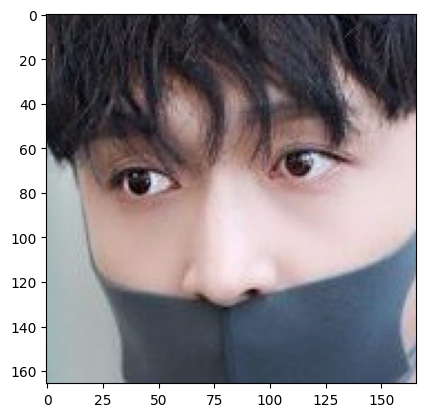

In [15]:
#Displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1005.jpg')
imgplot = plt.imshow(img)
plt.show()

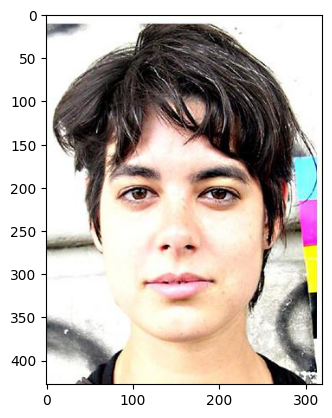

In [17]:
#Displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_1348.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

Step1: resize images

Step2: convert the images to numpy arrays

In [21]:
#convert images to numpy arrays

with_mask_path = '/content/data/with_mask/'
data = []

for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128, 128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

without_mask_path = '/content/data/without_mask/'
for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128, 128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

print(len(data))


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


7553


In [22]:
# Converting image list and labels list to numpy arrays

X = np.array(data)
Y = np.array(labels)


**Train Test Split**

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 2)

In [25]:
#Scaling data
X_train_scaled = X_train/255
X_test_scaled = X_test/255

**Building a Convolutional Neural Network**

In [26]:
import tensorflow as tf
from tensorflow import keras

In [28]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape = (128, 128, 3)))
model.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))

model.add(keras.layers.Conv2D(64, kernel_size = (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation = 'sigmoid'))

In [29]:
#compile the neural network
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])

In [30]:
# Training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 14s 22ms/step - loss: 0.4463 - acc: 0.8128 - val_loss: 0.2504 - val_acc: 0.9025
Epoch 2/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2820 - acc: 0.8871 - val_loss: 0.2231 - val_acc: 0.9041
Epoch 3/5
170/170 [==============================] - 3s 20ms/step - loss: 0.2302 - acc: 0.9128 - val_loss: 0.1931 - val_acc: 0.9289
Epoch 4/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1957 - acc: 0.9224 - val_loss: 0.1854 - val_acc: 0.9273
Epoch 5/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1624 - acc: 0.9388 - val_loss: 0.1783 - val_acc: 0.9388


**Model Evaluation**

In [31]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print("Test accuracy = ", accuracy)

48/48 [==============================] - 0s 10ms/step - loss: 0.2102 - acc: 0.9246
Test accuracy =  0.9245532751083374


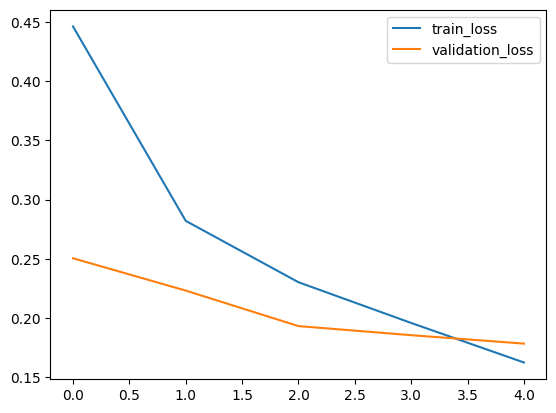

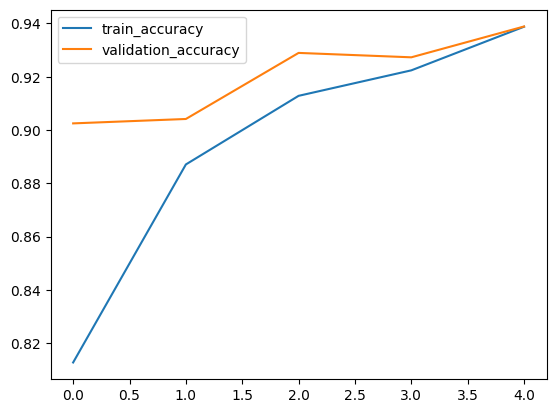

In [32]:
h = history

#plot the loss value
plt.plot(h.history['loss'], label = 'train_loss')
plt.plot(h.history['val_loss'], label = 'validation_loss')
plt.legend()
plt.show()

#plot the accuracy value
plt.plot(h.history['acc'], label = 'train_accuracy')
plt.plot(h.history['val_acc'], label = 'validation_accuracy')
plt.legend()
plt.show()

**Predicitve System**

Path of the image to be predicted: /content/download.jfif


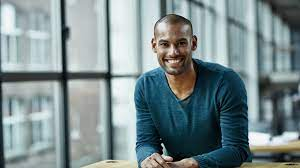

1/1 [==============================] - 0s 28ms/step
[[0.6278371  0.35674322]]
0
The person in the image is not wearing a mask.


In [39]:
input_image_path = input("Path of the image to be predicted: ")
input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128, 128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
  print("The person in the image is wearing a mask.")
else:
  print("The person in the image is not wearing a mask.")